In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [4]:
df = pd.DataFrame(house.data, columns = house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.shape

(20640, 9)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, random_state = seed, test_size = 0.2
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

### 모델정의

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# input_dim = X_data의 열의 수
model = Sequential([
    Dense(20, input_dim = 8, activation = 'relu'),  # 입력층
    Dense(6, activation = 'relu'),
    Dense(1)
    # 회귀에서의 출력층의 노드 수 = 1       
    # !!!!활성함수는 사용하지 않는다!!!!!
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 6)                 126       
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 회귀에서의 loss 는 MSE
# metrics에서는 사용하지 않음
# optimizer 의 default는 pmsprob이라서 생략
model.compile(loss = 'mean_squared_error')

In [10]:
hist = model.fit(X_train, y_train, validation_split= 0.1,
                 epochs = 100, batch_size = 256)

Epoch 1/100
59/59 [==============================] - 2s 8ms/step - loss: 30581.4082 - val_loss: 957.4070
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 383.2949 - val_loss: 89.2693
Epoch 3/100
59/59 [==============================] - 0s 5ms/step - loss: 111.1375 - val_loss: 86.3022
Epoch 4/100
59/59 [==============================] - 0s 5ms/step - loss: 79.8120 - val_loss: 7.6804
Epoch 5/100
59/59 [==============================] - 0s 4ms/step - loss: 72.3022 - val_loss: 23.5109
Epoch 6/100
59/59 [==============================] - 0s 6ms/step - loss: 73.9922 - val_loss: 32.9987
Epoch 7/100
59/59 [==============================] - 0s 4ms/step - loss: 76.9692 - val_loss: 5.6146
Epoch 8/100
59/59 [==============================] - 0s 5ms/step - loss: 73.5694 - val_loss: 11.6884
Epoch 9/100
59/59 [==============================] - 0s 4ms/step - loss: 68.5618 - val_loss: 3.4555
Epoch 10/100
59/59 [==============================] - 0s 4ms/step - loss: 77.9948 - val_

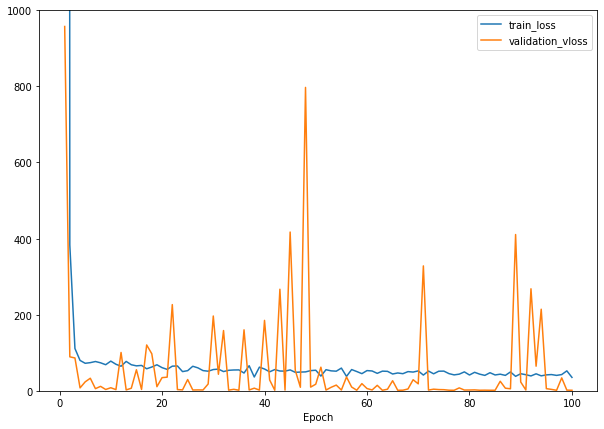

In [18]:
y_loss = hist.history['loss']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_loss)+1)

plt.figure(figsize = (10, 7))
plt.plot(xs, y_loss, label = 'train_loss')
plt.plot(xs, y_vloss, label = 'validation_vloss')
plt.legend()
plt.xlabel('Epoch')
plt.ylim([0,1000])
plt.show()

# train_loss 는 계속 줄지만..
# validation_lass는 계속 튐

### 평가

In [19]:
pred = model.predict(X_test)

In [22]:
dft = pd.DataFrame({'y_test' : y_test, 'pred' : pred.flatten()})
dft.head()

,y_test,pred
0,4.771,3.891151
1,1.371,2.013074
2,1.233,1.546014
3,0.938,1.052222
4,3.260,3.074772


### score 구하기

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# 여기서는 pred에 flatten을 해주지 않아도 됨.
mean_squared_error(y_test, pred), r2_score(y_test, pred)

(1.53574474243818, -0.1867381228201359)